## Data Set Description:

This data set contains chance to admit into graduate admission and several variables that may have association with it. The independent variables are GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA and Research. 500 rows and 9 columns of data in total.

Source of Data: Kaggle

## Research Question

How do these independent variables affect student's chance to admit into graduate program? What is the factor that affects the chance the most? 

The data set is of my interest because I have always been wondering what's the most crucial component in application. My personal speculation is that SOP and Research are more important than GRE and TOEFL score. We shall see whether the hypothesis is correct.



## Data Overview

In [11]:
import pandas as pd
df=pd.read_csv('Admission_Predict_Ver1.1.csv')
#Summary of Data
print(df.describe())

#Check missing data
print('-------------------------------------------------------------')
print('Number of Missing Value is {}'.format(df.isnull().sum().sum()))

       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

            LOR         CGPA    Research  Chance of Admit   
count  500.00000  500.000000  500.000000         500.00000  
mean     3.48400    8.576440    0.560000           0.72174  
std      0.92545    0.604813    0.496884           0.14114  
min      1.00000    6.800000    0.000000           0.34000  
2

There's no missing value is this dataset. There are also no clearly errorneous values based on the dataframe description. For each variable, its min, max, mean and standard deviation are all within reasonable range. There is no student who is having GRE score/TOEFL score/SOP/LOR/CGPA higher than the maximum score. University rating is also within a range of 1-5. Research is a boolean variable whereas 1 represents having research and 0 means no research experience. 

Some straight forward insights: 
* Average GRE Score and TOEFL Score is 316 and 107 
* Average University Rating is 3
* Average SOP, LOR, CGPA rating is 3.4,3.5,8.6
* 56% of the profiles have research experience. 

## Data Plot

Text(0,0.5,'Chance of Admit')

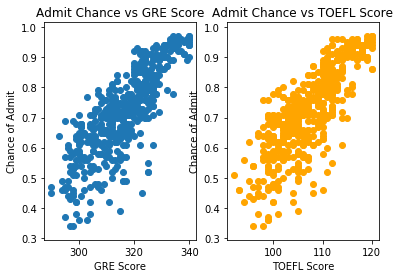

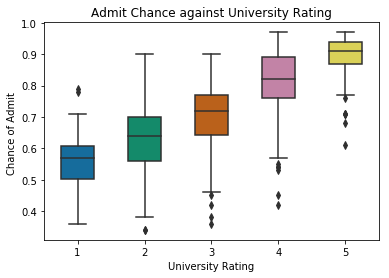

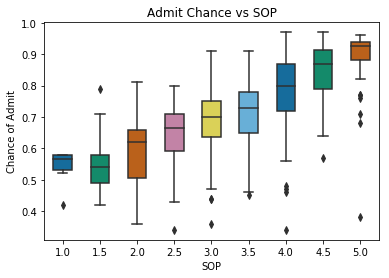

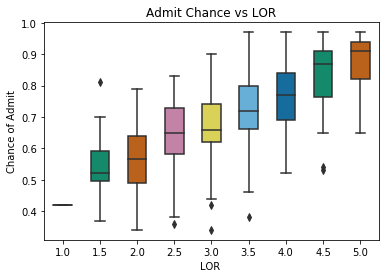

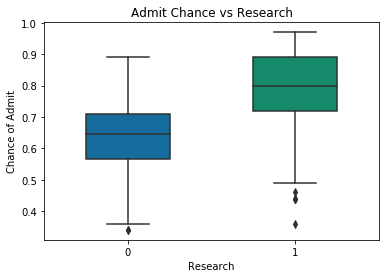

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

#plot admission chance with GRE and TOEFL Score
fig1,axes1=plt.subplots(1,2)
axes1[0].scatter(df['GRE Score'],df['Chance of Admit '])
axes1[0].set_title('Admit Chance vs GRE Score')
axes1[0].set_xlabel('GRE Score')
axes1[0].set_ylabel('Chance of Admit')

axes1[1].scatter(df['TOEFL Score'],df['Chance of Admit '],color='orange')
axes1[1].set_title('Admit Chance vs TOEFL Score')
axes1[1].set_xlabel('TOEFL Score')
axes1[1].set_ylabel('Chance of Admit')

#plot admission chance with University Rating
fig2=plt.figure()
axes2=sns.boxplot(y=df['Chance of Admit '], x=df['University Rating'], 
                 width=0.5,
                 palette="colorblind")
axes2.set_title("Admit Chance against University Rating")


#plot admission chance with SOP, LOR and CGPA
fig3=plt.figure()
axes3=sns.boxplot(x=df['SOP'],y=df['Chance of Admit '],width=0.5, palette="colorblind")
axes3.set_title('Admit Chance vs SOP')
axes3.set_xlabel('SOP')
axes3.set_ylabel('Chance of Admit')

fig4=plt.figure()
axes4=sns.boxplot(x=df['LOR '],y=df['Chance of Admit '],width=0.5,palette="colorblind")
axes4.set_title('Admit Chance vs LOR')
axes4.set_xlabel('LOR ')
axes4.set_ylabel('Chance of Admit')

#plot boxplot for admission chance against whether having research experience or not
fig5=plt.figure()
axes5=sns.boxplot(x=df['Research'],y=df['Chance of Admit '],width=0.5,palette="colorblind")
axes5.set_title('Admit Chance vs Research')
axes5.set_xlabel('Research')
axes5.set_ylabel('Chance of Admit')



<Figure size 432x288 with 0 Axes>

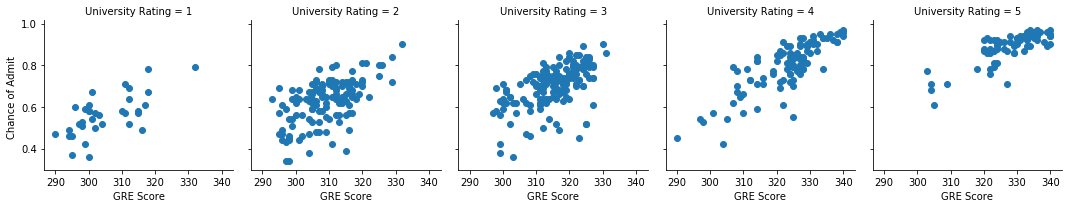

<Figure size 432x288 with 0 Axes>

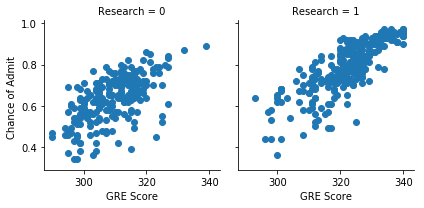

In [68]:
#plot relationship between GRE score and admission chance based on different university score
fig5=plt.figure()
g1=sns.FacetGrid(df, col='University Rating', margin_titles=True)
g1.map(plt.scatter, "GRE Score", "Chance of Admit ")

fig6=plt.figure()
g2=sns.FacetGrid(df, col='Research', margin_titles=True)
g2.map(plt.scatter, "GRE Score","Chance of Admit ")


## Insights

As observed from the above plots, we can see the association between admission chance and the dependent variables are very strong. 
* GRE score and TOEFL score have a very obvious positive linear relationship with admission chance, so are University Rating, SOP and LOR. In other words, the higher score you get in your GRE, TOEFL, University Rating, SOP and LOR, the higher the chance you get into admission.
* Students who have research experience have much higher admission chance than those who don't. 
* GRE Score and University Rating seem to have interaction. In other words, being in a higher ranking university may increase your chance to admit even more when you are having a high GRE score compared with being in a lower ranking university and having a high GRE score. Increase of 1 GRE Score may increase your chance of admit by 0.1 if you are in a lower ranking university, but may increase your chance of admit by 0.3 if you are in a higher ranking university for example (numbers are for illustration purpose)
* However, research experience doesn't seem to have an impact on the relationship between chance of admit and GRE Score. In other words, no matter whether you have research experience, every 1 score increase in GRE will help you increase equal amount of chance of admit. 